In [1]:
# Dependencies and Setup
%load_ext lab_black
import pandas as pd
import numpy as np
import requests
import json
import world_bank_data as wb
import plotly
import plotly.express as px

In [2]:
# Extracting GDP_2018 data from World Bank using wrapped api
GDP_WB = wb.get_series(
    "NY.GDP.MKTP.CD", date="2018", id_or_value="id", simplify_index=True
)
GDP_WB

Country
ARB    2.772025e+12
CSS    7.345916e+10
CEB    1.637175e+12
EAR    1.163520e+13
EAS    2.634698e+13
           ...     
VIR             NaN
PSE    1.461590e+10
YEM    2.759126e+10
ZMB    2.700524e+10
ZWE    2.431156e+10
Name: NY.GDP.MKTP.CD, Length: 264, dtype: float64

In [3]:
# Creating data frame for World Bank's GDP_2018 data: df_GDP
df_GDP = pd.DataFrame(GDP_WB).reset_index()
df_GDP

,Country,NY.GDP.MKTP.CD
0,ARB,2.772025e+12
1,CSS,7.345916e+10
2,CEB,1.637175e+12
3,EAR,1.163520e+13
4,EAS,2.634698e+13
...,...,...
259,VIR,NaN
260,PSE,1.461590e+10
261,YEM,2.759126e+10
262,ZMB,2.700524e+10


In [4]:
# Converting GDP-USD (NY.GDP.MKTP.CD) data to million
GDP_2018_million = np.array(df_GDP["NY.GDP.MKTP.CD"] / 1000000)
len(GDP_2018_million)

264

In [5]:
# Adding a new column "GDP_2018 (million)" to data frame df_GDP
df_GDP["GDP_2018 (million)"] = GDP_2018_million
df_GDP

,Country,NY.GDP.MKTP.CD,GDP_2018 (million)
0,ARB,2.772025e+12,2.772025e+06
1,CSS,7.345916e+10,7.345916e+04
2,CEB,1.637175e+12,1.637175e+06
3,EAR,1.163520e+13,1.163520e+07
4,EAS,2.634698e+13,2.634698e+07
...,...,...,...
259,VIR,NaN,NaN
260,PSE,1.461590e+10,1.461590e+04
261,YEM,2.759126e+10,2.759126e+04
262,ZMB,2.700524e+10,2.700524e+04


In [6]:
# Exporting & saving df_GDP data to csv file
df_GDP.to_csv("Resources/GDP_WB.csv", index=False)

In [7]:
# Reading the csv files for independent and dependent variables
GDP_2018 = pd.read_csv("Resources/GDP_WB.csv")
innov_tech_2018 = pd.read_csv("Resources/Innovation&Technology_WB.csv")
doing_busn_2018 = pd.read_csv("Resources/DoingBusiness_WB.csv")
capital_lat_lng = pd.read_csv("Resources/Capital_Lat_Lng.csv")
FDI_USA_2018 = pd.read_csv("Resources/InwardFDI_USA_BeaGOV.csv")

In [8]:
# Merging GDP_2018 and innov_tech_2018 for Country and country_name
df_1 = pd.merge(GDP_2018, innov_tech_2018, on="Country", how="outer").drop(
    [
        "NY.GDP.MKTP.CD",
        "GDP_2018 (million)",
        "indicator_name",
        "indicator_code",
        "tech_export_2017 (million)",
        "tech_export_2018 (million)",
        "tech_export_2019 (million)",
    ],
    axis=1,
)

df_1

,Country,country_name
0,ARB,Arab World
1,CSS,Caribbean small states
2,CEB,NaN
3,EAR,NaN
4,EAS,NaN
...,...,...
259,VIR,NaN
260,PSE,West Bank and Gaza
261,YEM,"Yemen, Rep."
262,ZMB,Zambia


In [9]:
# Merging for capital_city, lat, and lng
df_2 = pd.merge(df_1, capital_lat_lng, on="country_name", how="outer")
df_2

,Country,country_name,capital_city,lat,lng
0,ARB,Arab World,NaN,NaN,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667
2,CEB,NaN,NaN,NaN,NaN
3,EAR,NaN,NaN,NaN,NaN
4,EAS,NaN,NaN,NaN,NaN
...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745


In [10]:
# Merging for GDP_2018 (million)
df_3 = pd.merge(df_2, GDP_2018, on="Country", how="outer").drop(
    ["NY.GDP.MKTP.CD"], axis=1,
)
df_3

,Country,country_name,capital_city,lat,lng,GDP_2018 (million)
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07
...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN


In [11]:
# Merging for tech_export_2018 (million)
df_4 = (
    pd.merge(df_3, innov_tech_2018, on="country_name", how="outer")
    .drop(
        [
            "Country_y",
            "indicator_name",
            "indicator_code",
            "tech_export_2017 (million)",
            "tech_export_2019 (million)",
        ],
        axis=1,
    )
    .rename(columns={"Country_x": "country_code"})
)

df_4

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million)
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04,NaN
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06,NaN
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07,NaN
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07,NaN
...,...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN,NaN


In [12]:
# Merging for doing_business_2018
df_5 = pd.merge(df_4, doing_busn_2018, on="country_name", how="outer").drop(
    ["doing_business_2017", "doing_business_2019"], axis=1,
)
df_5

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018
0,ARB,Arab World,NaN,NaN,NaN,2.772025e+06,NaN,NaN
1,CSS,Caribbean small states,Kralendijk,12.1500,-68.2667,7.345916e+04,NaN,NaN
2,CEB,NaN,NaN,NaN,NaN,1.637175e+06,NaN,NaN
3,EAR,NaN,NaN,NaN,NaN,1.163520e+07,NaN,NaN
4,EAS,NaN,NaN,NaN,NaN,2.634698e+07,NaN,NaN
...,...,...,...,...,...,...,...,...
286,NaN,Turks and Caicos Islands,Cockburn Town,21.4612,-71.1419,NaN,NaN,NaN
287,NaN,United States of America,"Washington, D.C.",38.8951,-77.0364,NaN,NaN,NaN
288,NaN,Virgin Islands (U.S.),Charlotte Amalie,18.3419,-64.9307,NaN,NaN,NaN
289,NaN,Wallis and Futuna Islands,Matu-Utu,-13.2816,-176.1745,NaN,NaN,NaN


In [13]:
# Dependent Variable = FDI in USA; extracting FDI in USA data for 2018 and cleaning for null values
df_6 = FDI_USA_2018.drop(
    ["fdi_USA_2017 (million)", "fdi_USA_2019 (million)"], axis=1,
).dropna()

df_6

,country_name,region,fdi_USA_2018 (million)
0,Afghanistan,Asia,1.0
1,Albania,Europe,0.0
3,Andorra,Europe,0.0
6,Antigua and Barbuda,Latin America,3.0
7,Argentina,Latin America,822.0
...,...,...,...
201,Vietnam,Asia,59.0
202,Western Sahara,Africa,0.0
203,"Yemen, Rep.",Asia,0.0
204,Zambia,Africa,-6.0


In [14]:
# Creating the clean dataset for analysis
clean_data = pd.merge(df_5, df_6, on="country_name", how="right")
clean_data

,country_code,country_name,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
0,AFG,Afghanistan,Kabul,34.5289,69.1725,19484.384937,NaN,37.1,Asia,1.0
1,ALB,Albania,Tiranë (Tirana),41.3275,19.8189,15147.020535,0.5917,66.8,Europe,0.0
2,AND,Andorra,Andorra la Vella,42.5078,1.5211,3218.316013,33.9135,NaN,Europe,0.0
3,ATG,Antigua and Barbuda,St. John's,17.1172,-61.8457,1610.574074,0.0114,59.8,Latin America,3.0
4,ARG,Argentina,Buenos Aires,-34.6051,-58.4004,519871.519808,647.1724,57.3,Latin America,822.0
...,...,...,...,...,...,...,...,...,...,...
175,NaN,Taiwan,Taibei,25.0470,121.5457,NaN,NaN,80.7,Asia,10512.0
176,NaN,Western Sahara,El Aaiún,27.1532,-13.2014,NaN,NaN,NaN,Africa,0.0
177,NaN,Curacao,NaN,NaN,NaN,NaN,NaN,NaN,Latin America,1335.0
178,NaN,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,Africa,0.0


In [15]:
# Exporting & saving clean_data to csv file
clean_data.to_csv("Resources/clean_data.csv", index=False)

In [30]:
# Generating data frame for "FDI in USA (Yr 2018): Top 25 Countries"
top_fdi = clean_data.loc[(clean_data["fdi_USA_2018 (million)"] >= 13159.0)].sort_values(
    ["fdi_USA_2018 (million)"], ascending=False
)
bar_fdi = top_fdi.rename(
    columns={
        "country_name": "Countries",
        "fdi_USA_2018 (million)": "FDI in USA (million)",
    }
)

bar_fdi

# top_fdi = clean_data.sort_values(["fdi_USA_2018 (million)"], ascending=False)
# top_fdi.head(25)

,country_code,Countries,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),doing_business_2018,region,FDI in USA (million)
166,GBR,United Kingdom,London,51.5085,-0.1257,2.860668e+06,76926.5410,83.2,Europe,496622.0
72,JPN,Japan,Tokyo,35.6895,139.6917,4.954807e+06,111000.0000,78.0,Asia,493763.0
109,NLD,Netherlands,Amsterdam,52.3740,4.8897,9.141048e+05,85690.5732,76.1,Europe,462303.0
27,CAN,Canada,Ottawa-Gatineau,45.4166,-75.6980,1.716263e+06,31036.3169,79.3,Canada,442802.0
54,DEU,Germany,Berlin,52.5244,13.4105,3.949549e+06,210000.0000,79.3,Europe,328124.0
88,LUX,Luxembourg,Luxembourg,49.6117,6.1300,7.091996e+04,858.2699,69.6,Europe,312976.0
150,CHE,Switzerland,Bern,46.9481,7.4474,7.051406e+05,30136.2426,76.6,Europe,295783.0
50,FRA,France,Paris,48.8534,2.3488,2.787864e+06,118000.0000,76.0,Europe,268169.0
68,IRL,Ireland,Dublin,53.3331,-6.2489,3.826744e+05,36493.7948,80.1,Europe,265004.0
143,ESP,Spain,Madrid,40.4165,-3.7026,1.419735e+06,16982.2448,77.6,Europe,83379.0


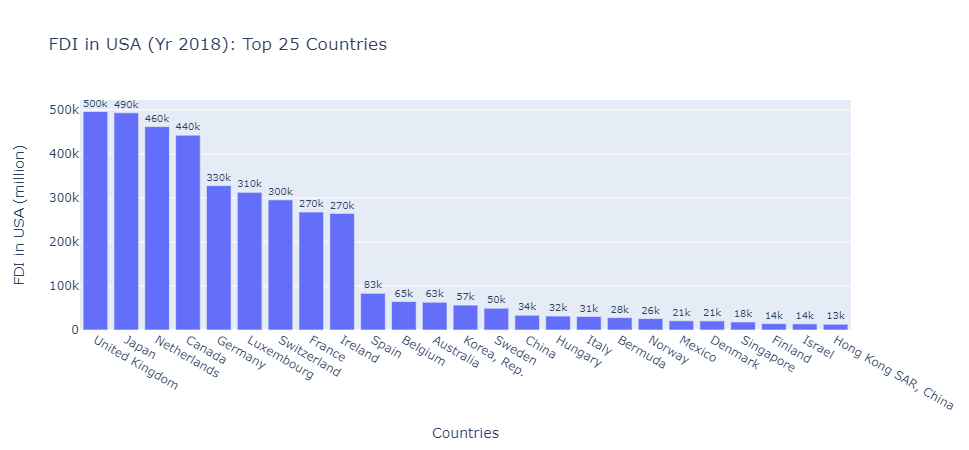

In [31]:
# Creating bar plot for "FDI in USA (Yr 2018): Top 25 Countries"
fig_bar_fdi = px.bar(
    bar_fdi,
    y="FDI in USA (million)",
    x="Countries",
    text="FDI in USA (million)",
    title="FDI in USA (Yr 2018): Top 25 Countries",
)
fig_bar_fdi.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig_bar_fdi.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
fig_bar_fdi.write_image("Images/FDI_USA_top25.png")
fig_bar_fdi.show()

In [32]:
# Generating data frame for "GDP in USD-Million (Yr 2018): Top 25 Countries"
top_GDP = clean_data.loc[(clean_data["GDP_2018 (million)"] >= 4.341666e05)].sort_values(
    ["GDP_2018 (million)"], ascending=False
)

bar_GDP = top_GDP.rename(
    columns={
        "country_name": "Countries",
        "GDP_2018 (million)": "GDP by Countries (million)",
    }
)

bar_GDP

# top_GDP = clean_data.sort_values(["GDP_2018 (million)"], ascending=False)
# top_GDP.head(25)

,country_code,Countries,capital_city,lat,lng,GDP by Countries (million),tech_export_2018 (million),doing_business_2018,region,fdi_USA_2018 (million)
31,CHN,China,Beijing,39.9075,116.3972,1.389482e+07,732000.0000,65.2,Asia,33543.0
72,JPN,Japan,Tokyo,35.6895,139.6917,4.954807e+06,111000.0000,78.0,Asia,493763.0
54,DEU,Germany,Berlin,52.5244,13.4105,3.949549e+06,210000.0000,79.3,Europe,328124.0
166,GBR,United Kingdom,London,51.5085,-0.1257,2.860668e+06,76926.5410,83.2,Europe,496622.0
50,FRA,France,Paris,48.8534,2.3488,2.787864e+06,118000.0000,76.0,Europe,268169.0
65,IND,India,Delhi,28.6667,77.2167,2.713165e+06,20273.0902,60.9,Asia,5127.0
70,ITA,Italy,Roma (Rome),41.8947,12.4811,2.085764e+06,32581.0252,73.2,Europe,30749.0
21,BRA,Brazil,Brasília,-15.7797,-47.9297,1.885483e+06,11096.2805,55.6,Latin America,2514.0
78,KOR,"Korea, Rep.",Seoul,37.5683,126.9778,1.720579e+06,193000.0000,84.0,Asia,56612.0
27,CAN,Canada,Ottawa-Gatineau,45.4166,-75.6980,1.716263e+06,31036.3169,79.3,Canada,442802.0


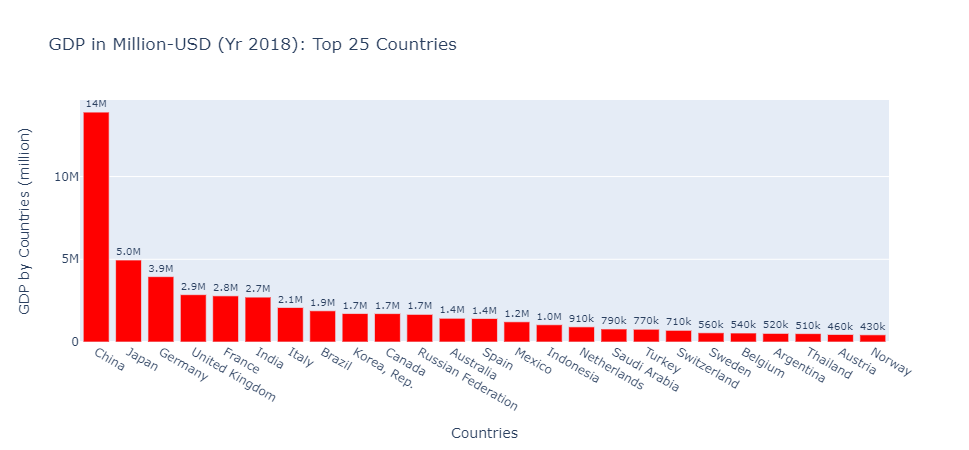

In [33]:
# Creating bar plot for "GDP in USD-Million (Yr 2018): Top 25 Countries"
fig_bar_GDP = px.bar(
    bar_GDP,
    y="GDP by Countries (million)",
    x="Countries",
    text="GDP by Countries (million)",
    color_discrete_sequence=["red"] * len(bar_GDP),
    title="GDP in Million-USD (Yr 2018): Top 25 Countries",
)
fig_bar_GDP.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig_bar_GDP.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
fig_bar_GDP.write_image("Images/GDP_top25.png")
fig_bar_GDP.show()

In [36]:
# Generating data frame for "Innovation & Technology (Yr 2018): Top 25 Countries"
top_innov_tech = clean_data.loc[
    (clean_data["tech_export_2018 (million)"] >= 12971.9030)
].sort_values(["tech_export_2018 (million)"], ascending=False)

bar_innov_tech = top_innov_tech.rename(
    columns={
        "country_name": "Countries",
        "tech_export_2018 (million)": "Export of High-Tech (million)",
    }
)

bar_innov_tech

# top_IT = clean_data.sort_values(["tech_export_2018 (million)"], ascending=False)
# top_IT.head(25)

,country_code,Countries,capital_city,lat,lng,GDP_2018 (million),Export of High-Tech (million),doing_business_2018,region,fdi_USA_2018 (million)
31,CHN,China,Beijing,39.9075,116.3972,1.389482e+07,732000.0000,65.2,Asia,33543.0
63,HKG,"Hong Kong SAR, China",Hong Kong,22.2796,114.1887,3.616931e+05,330000.0000,85.0,Asia,13159.0
54,DEU,Germany,Berlin,52.5244,13.4105,3.949549e+06,210000.0000,79.3,Europe,328124.0
78,KOR,"Korea, Rep.",Seoul,37.5683,126.9778,1.720579e+06,193000.0000,84.0,Asia,56612.0
135,SGP,Singapore,Singapore,1.2897,103.8501,3.732171e+05,155000.0000,85.6,Asia,18267.0
50,FRA,France,Paris,48.8534,2.3488,2.787864e+06,118000.0000,76.0,Europe,268169.0
72,JPN,Japan,Tokyo,35.6895,139.6917,4.954807e+06,111000.0000,78.0,Asia,493763.0
91,MYS,Malaysia,Kuala Lumpur,3.1412,101.6865,3.585819e+05,90395.9030,78.8,Asia,1218.0
109,NLD,Netherlands,Amsterdam,52.3740,4.8897,9.141048e+05,85690.5732,76.1,Europe,462303.0
171,VNM,Vietnam,Hà Noi,21.0245,105.8412,2.452137e+05,82613.4210,67.0,Asia,59.0


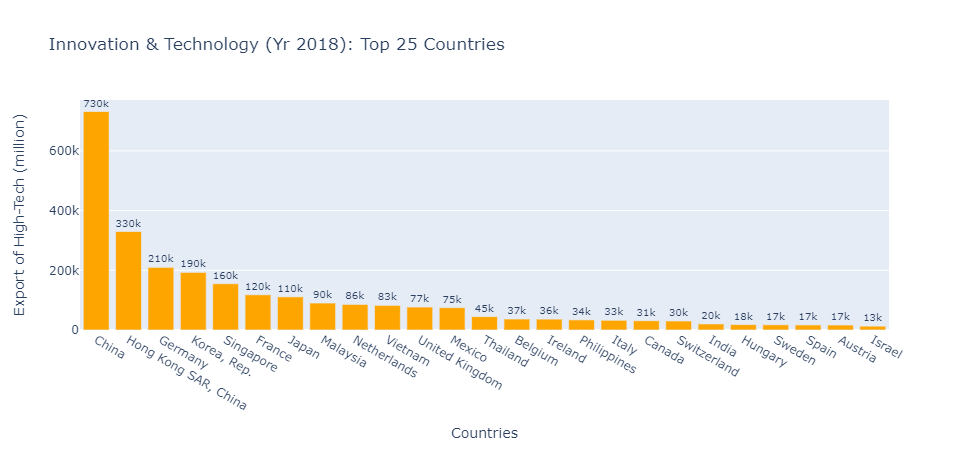

In [38]:
# Creating bar plot for "Innovation & Technology (Yr 2018): Top 25 Countries"
fig_bar_innov_tech = px.bar(
    bar_innov_tech,
    y="Export of High-Tech (million)",
    x="Countries",
    text="Export of High-Tech (million)",
    color_discrete_sequence=["orange"] * len(bar_innov_tech),
    title="Innovation & Technology (Yr 2018): Top 25 Countries",
)
fig_bar_innov_tech.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig_bar_innov_tech.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
fig_bar_innov_tech.write_image("Images/innov_tech_top25.png")
fig_bar_innov_tech.show()

In [39]:
# Generating data frame for "Doing Business Indicator (Yr 2018): Top 25 Countries"
top_doing_busn = clean_data.loc[
    (clean_data["doing_business_2018"] >= 76.9)
].sort_values(["doing_business_2018"], ascending=False)

bar_doing_busn = top_doing_busn.rename(
    columns={
        "country_name": "Countries",
        "doing_business_2018": "Doing Business Indicator (100)",
    }
)

bar_doing_busn

# top_DB = clean_data.sort_values(["doing_business_2018"], ascending=False)
# top_DB.head(25)

,country_code,Countries,capital_city,lat,lng,GDP_2018 (million),tech_export_2018 (million),Doing Business Indicator (100),region,fdi_USA_2018 (million)
110,NZL,New Zealand,Wellington,-41.2866,174.7756,2.079206e+05,606.9409,87.0,New Zealand,2107.0
135,SGP,Singapore,Singapore,1.2897,103.8501,3.732171e+05,155000.0000,85.6,Asia,18267.0
63,HKG,"Hong Kong SAR, China",Hong Kong,22.2796,114.1887,3.616931e+05,330000.0000,85.0,Asia,13159.0
39,DNK,Denmark,København (Copenhagen),55.6759,12.5655,3.556753e+05,9587.8754,84.6,Europe,20654.0
78,KOR,"Korea, Rep.",Seoul,37.5683,126.9778,1.720579e+06,193000.0000,84.0,Asia,56612.0
166,GBR,United Kingdom,London,51.5085,-0.1257,2.860668e+06,76926.5410,83.2,Europe,496622.0
53,GEO,Georgia,Tbilisi,41.6941,44.8337,1.759970e+04,26.9503,83.0,Europe,0.0
115,NOR,Norway,Oslo,59.9127,10.7461,4.341666e+05,4294.5429,82.7,Europe,26007.0
149,SWE,Sweden,Stockholm,59.3326,18.0649,5.554554e+05,17441.8322,82.2,Europe,49546.0
7,AUS,Australia,Canberra,-35.2835,149.1281,1.433904e+06,5274.0798,80.8,Australia,63070.0


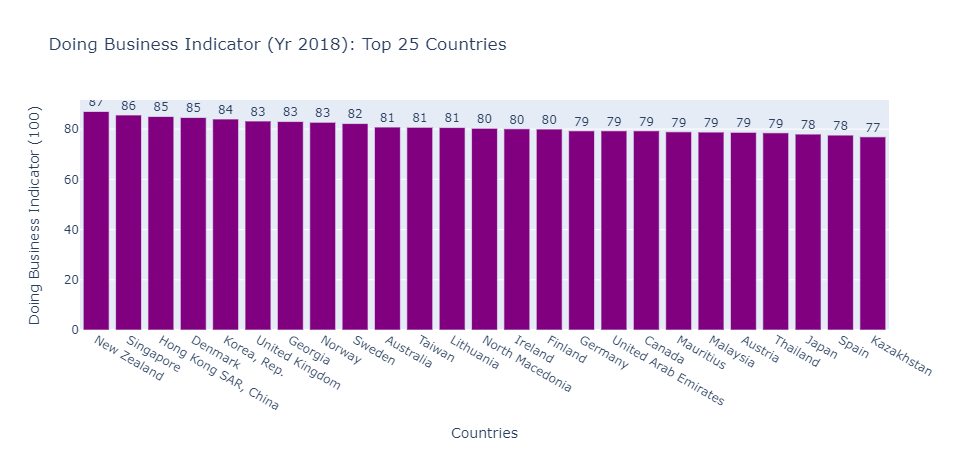

In [40]:
# Creating bar plot for "Doing Business Indicator (Yr 2018): Top 25 Countries"
fig_bar_doing_busn = px.bar(
    bar_doing_busn,
    y="Doing Business Indicator (100)",
    x="Countries",
    text="Doing Business Indicator (100)",
    color_discrete_sequence=["purple"] * len(bar_innov_tech),
    title="Doing Business Indicator (Yr 2018): Top 25 Countries",
)
fig_bar_doing_busn.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig_bar_doing_busn.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
fig_bar_doing_busn.write_image("Images/doing_busn_top25.png")
fig_bar_doing_busn.show()

In [41]:
# Generating statistical data frame for FDI_USA_mean_2018, GDP_mean_2018, I&T_mean_2018, and doing_busn_mean_2018 by regions
fdi_mean_region = clean_data.groupby("region")["fdi_USA_2018 (million)"].mean()
GDP_mean_region = clean_data.groupby("region")["GDP_2018 (million)"].mean()
IT_mean_region = clean_data.groupby("region")["tech_export_2018 (million)"].mean()
doing_busn_mean_region = clean_data.groupby("region")["doing_business_2018"].mean()
stat_region = pd.DataFrame(
    {
        "FDI_USA_mean_2018": fdi_mean_region,
        "GDP_mean_2018": GDP_mean_region,
        "I&T_mean_2018": IT_mean_region,
        "doing_busn_mean_2018": doing_busn_mean_region,
    }
)

stat_region_sort = (
    stat_region.reset_index()
    .sort_values(["FDI_USA_mean_2018"], ascending=False)
    .drop([3, 2, 6], axis=0)
)

stat_region_mean = stat_region_sort.rename(
    columns={"region": "Regions", "FDI_USA_mean_2018": "Avg FDI in USA (million)",}
)

stat_region_mean

,Regions,Avg FDI in USA (million),GDP_mean_2018,I&T_mean_2018,doing_busn_mean_2018
4,Europe,56778.591837,470200.597925,18096.937407,73.620455
1,Asia,15065.295455,720975.035939,72673.699236,60.363415
5,Latin America,1995.514286,179768.328626,4992.549433,59.065517
0,Africa,101.285714,42716.293813,147.366219,51.248936


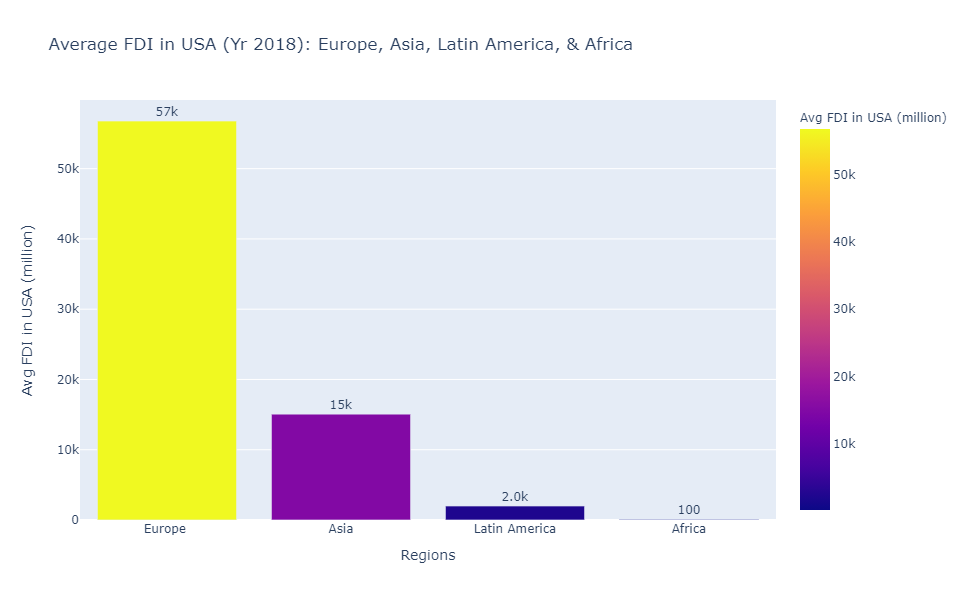

In [43]:
# Creating bar plot for "Average FDI in USA (Yr 2018): By Regions"
fig_bar_fdi_region = px.bar(
    stat_region_mean,
    y="Avg FDI in USA (million)",
    x="Regions",
    text="Avg FDI in USA (million)",
    color="Avg FDI in USA (million)",
    height=600,
    title="Average FDI in USA (Yr 2018): Europe, Asia, Latin America, & Africa",
)
fig_bar_fdi_region.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig_bar_fdi_region.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
fig_bar_fdi_region.write_image("Images/Mean_FDI_USA_region.png")
fig_bar_fdi_region.show()